In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


%matplotlib inline


# Remove the data conversion warning.
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [6]:
df = pd.read_csv('mrna_seq.csv')

In [7]:
df = df.drop(columns=['Entrez_Gene_Id'])

In [8]:
df = df.transpose()

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31630,31631,31632,31633,31634,31635,31636,31637,31638,31639
Hugo_Symbol,A1BG,A1CF,A1CF,A1CF,A1CF,A1CF,A1CF,A2LD1,A2LD1,A2M,...,ZXDA,ZXDB,ZXDC,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX,ZZEF1,ZZZ3
sclc_ucologne_2015_S00022,14.0824,0.010387,0.000402,0.0,0.0,0.0,0.0,0.863905,0.447098,28.1252,...,1.48905,2.77656,21.3041,4.83247,0.632511,9.07695,7.1566,1.18055,6.25057,20.8546
sclc_ucologne_2015_S00035,5.46565,0.005099,0.000422,0.0,0.0,0.0,0.0,1.15179,0.246576,39.6673,...,1.8429,4.27246,5.16002,4.02688,1.16518,6.86839,8.55297,19.8926,2.18432,13.0801
sclc_ucologne_2015_S00050,3.70024,0.002786,0.000231,0.0,0.0,0.0,0.0,1.3101,12.4908,45.7157,...,1.57856,3.38411,12.9988,4.89367,0.925367,10.7256,9.907,9.199,4.35937,9.5039
sclc_ucologne_2015_S00213,5.69252,0.00199,0.000331,0.000002,0.000002,0.0,0.0,0.993293,0.201043,86.3615,...,2.92435,7.97671,7.90902,2.49084,0.392704,7.02023,13.7481,10.0043,3.59856,15.2865


In [10]:
df.to_csv(r'final.csv', index = False)

In [11]:
# read in data; use default pd.RangeIndex, i.e. 0, 1, 2, etc., as columns
data = pd.read_csv('final.csv', header=1)

In [12]:
data.head()

,A1BG,A1CF,A1CF.1,A1CF.2,A1CF.3,A1CF.4,A1CF.5,A2LD1,A2LD1.1,A2M,...,ZXDA,ZXDB,ZXDC,ZXDC.1,ZYG11A,ZYG11B,ZYX,ZYX.1,ZZEF1,ZZZ3
0,14.08240,0.010387,0.000402,0.000000,0.000000,0.0,0.0,0.863905,0.447098,28.1252,...,1.48905,2.77656,21.30410,4.83247,0.632511,9.07695,7.15660,1.18055,6.25057,20.8546
1,5.46565,0.005099,0.000422,0.000000,0.000000,0.0,0.0,1.151790,0.246576,39.6673,...,1.84290,4.27246,5.16002,4.02688,1.165180,6.86839,8.55297,19.89260,2.18432,13.0801
2,3.70024,0.002786,0.000231,0.000000,0.000000,0.0,0.0,1.310100,12.490800,45.7157,...,1.57856,3.38411,12.99880,4.89367,0.925367,10.72560,9.90700,9.19900,4.35937,9.5039
3,5.69252,0.001990,0.000331,0.000002,0.000002,0.0,0.0,0.993293,0.201043,86.3615,...,2.92435,7.97671,7.90902,2.49084,0.392704,7.02023,13.74810,10.00430,3.59856,15.2865
4,4.90083,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.375980,0.088599,125.9230,...,2.13700,3.68121,9.75627,3.87663,0.532978,7.40339,19.18040,16.73750,4.57431,10.8989


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Columns: 31640 entries, A1BG to ZZZ3
dtypes: float64(31640)
memory usage: 19.6 MB


In [14]:
data.to_csv(r'dataset.csv', index = False)

In [15]:
X= data

y = pd.read_csv('N_Stage.csv')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
# randomly assign some data to the test-set and the rest to the training-set

X_train.head()

,A1BG,A1CF,A1CF.1,A1CF.2,A1CF.3,A1CF.4,A1CF.5,A2LD1,A2LD1.1,A2M,...,ZXDA,ZXDB,ZXDC,ZXDC.1,ZYG11A,ZYG11B,ZYX,ZYX.1,ZZEF1,ZZZ3
7,6.22679,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.43779,0.471633,279.7220,...,2.297050,3.74445,10.16590,3.35534,0.584838,6.70157,20.60410,18.01810,3.94993,11.91430
76,1.86425,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.90674,0.970232,57.4489,...,2.252150,4.54198,7.46066,1.53925,3.213420,6.18036,7.08415,10.68780,3.40575,16.13060
80,1.93930,0.020594,0.000395,0.019422,0.000000,0.0,0.0,2.08457,0.381339,77.6282,...,1.596690,3.11757,13.15910,6.78297,0.246591,4.57444,14.09890,19.64540,4.41081,11.34930
40,3.44654,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.25718,0.117206,171.0060,...,0.953574,2.12795,6.66465,1.36533,0.422586,4.62804,14.73530,15.28340,2.05612,16.11820
43,8.44904,0.002591,0.000429,0.000002,0.000003,0.0,0.0,5.65798,81.452200,88.0711,...,1.571000,4.54663,7.00054,1.68735,0.900723,8.04517,2.38873,9.49664,1.71921,7.35433


In [17]:
from sklearn import preprocessing

# Here, I standardize by X data using StandardScalar
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled.shape

(60, 31640)

array([0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0])

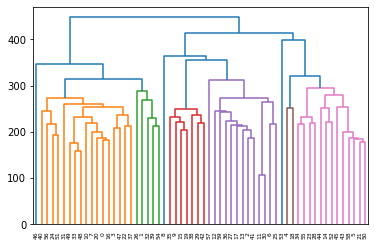

In [39]:
dendrogram = sch.dendrogram(sch.linkage(X_train_scaled, method='ward'))
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete') # Here as use "complete" linkage
hc.fit(X_train_scaled)
hc.labels_

In [40]:
df.head()#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 42)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_scaled,y_train)
y_pred=clf.predict(X_test_scaled)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy on Test Data:",metrics.accuracy_score(y_test, y_pred))

model = clf
print("Random Forest Classifier's cross validation accuracy:", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))
print("Random Forest Classifier's Test-Data prediction accuracy: {:.5f}".format(model.score(X_test_scaled, y_test)))

/Users/whale9707/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Random Forest Classifier's cross validation accuracy: 0.5333333333333333
Random Forest Classifier's Test-Data prediction accuracy: 0.61905


In [42]:
model.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
import time

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.051 seconds


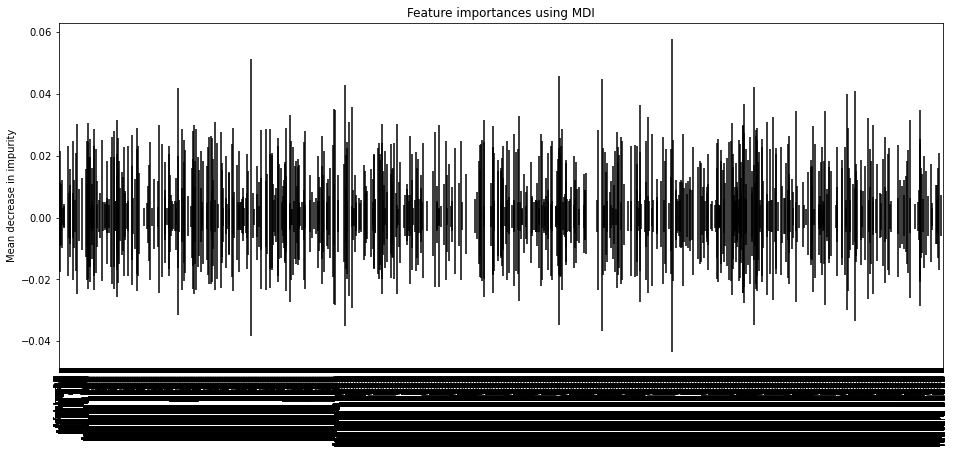

In [45]:
feature_names = [f"feature {i}" for i in range(X_train_scaled.shape[1])]

model_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots()
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(15, 8)

In [ ]:
#from tensorflow.keras.optimizers import SGD
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.regularizers import l1, l2, l1_l2

In [1]:
feature_count = X_train_scaled.shape[1] # count of features in input data
loss = 'categorical_crossentropy'
optimizer = 'sgd'
epochs = 300

NameError: name 'X_train_scaled' is not defined